### 参考文献
- http://mlg.eng.cam.ac.uk/yarin/thesis/thesis.pdf

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, regularizers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import datetime
from PIL import Image
import collections
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
import math

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# plt.rcParams.update(plt.rcParamsDefault)

## カラーマップ作成

In [38]:
cdict = [None for i in range(3)]
color_alpha = [None for i in range(3)]

# 3色のカラーコード
color_set = [[255, 99, 71], [46, 118, 255], [206, 255, 97]]

# 透明度の偏り
p = 0.9

p_max = 1

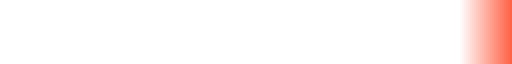

In [39]:
color = color_set[0]

cdict[0] = {
    "red": [
        (0.0, 0.0, color[0] / 255.),
        (1.0, color[0] / 255., 1.0),
    ],
    "green": [
        (0.0, 0.0, color[1] / 255.),
        (1.0, color[1] / 255., 0.0),
    ],
    "blue": [
        (0.0, 0.0, color[2] / 255.),
        (1.0, color[2] / 255., 0.0),
    ],
    "alpha": [
        (0.0, 0.0, 0.0),
        (p, 0.0, 0.0),
        (1.0, p_max, 1.0),
    ]
}

color_alpha[0] = LinearSegmentedColormap('color0_alpha', cdict[0])
color_alpha[0]

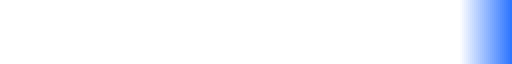

In [40]:
color = color_set[1]

cdict[1] = {
    "red": [
        (0.0, 0.0, color[0] / 255.),
        (1.0, color[0] / 255., 1.0),
    ],
    "green": [
        (0.0, 0.0, color[1] / 255.),
        (1.0, color[1] / 255., 0.0),
    ],
    "blue": [
        (0.0, 0.0, color[2] / 255.),
        (1.0, color[2] / 255., 0.0),
    ],
    "alpha": [
        (0.0, 0.0, 0.0),
        (p, 0.0, 0.0),
        (1.0, p_max, 1.0),
    ]
}

color_alpha[1] = LinearSegmentedColormap('color1_alpha', cdict[1])
color_alpha[1]

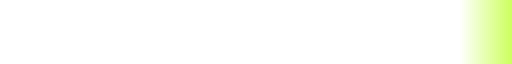

In [41]:
color = color_set[2]

cdict[2] = {
    "red": [
        (0.0, 0.0, color[0] / 255.),
        (1.0, color[0] / 255., 1.0),
    ],
    "green": [
        (0.0, 0.0, color[1] / 255.),
        (1.0, color[1] / 255., 0.0),
    ],
    "blue": [
        (0.0, 0.0, color[2] / 255.),
        (1.0, color[2] / 255., 0.0),
    ],
    "alpha": [
        (0.0, 0.0, 0.0),
        (p, 0.0, 0.0),
        (1.0, p_max, 1.0),
    ]
}

color_alpha[2] = LinearSegmentedColormap('color2_alpha', cdict[2])
color_alpha[2]

In [42]:
# X = np.arange(start=0, stop=1, step=0.01)

# x1 = stats.norm.pdf(x=X, loc=0.6, scale=0.4)
# x2 = stats.norm.pdf(x=X, loc=0.2, scale=0.1)

# plt.figure(figsize=(10, 2))
# sns.heatmap([x1], cmap=color_alpha[0])
# sns.heatmap([x2], cmap=color_alpha[1])
# plt.show()

## データセット作成
訓練データ 50000、検証データ 10000、テストデータ 10000

In [12]:
(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data()

x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=10000)

x_train = x_train.reshape((-1, 28, 28, 1)) / 255.
x_valid = x_valid.reshape((-1, 28, 28, 1)) / 255.
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.

# one-hot vectorに変換
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## モデル構築

In [13]:
# L2 = 0.01
DROPOUT_RATE = 0.5
activation = "relu"

最終のFC層の手前にドロップアウトを配置

In [14]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, 3, activation=activation)(inputs)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(128, activation=activation)(x)
x = Dropout(DROPOUT_RATE)(x, training=True) # training=True -> MC-Dropout
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (N

2021-11-24 04:18:03.403146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-24 04:18:03.403763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


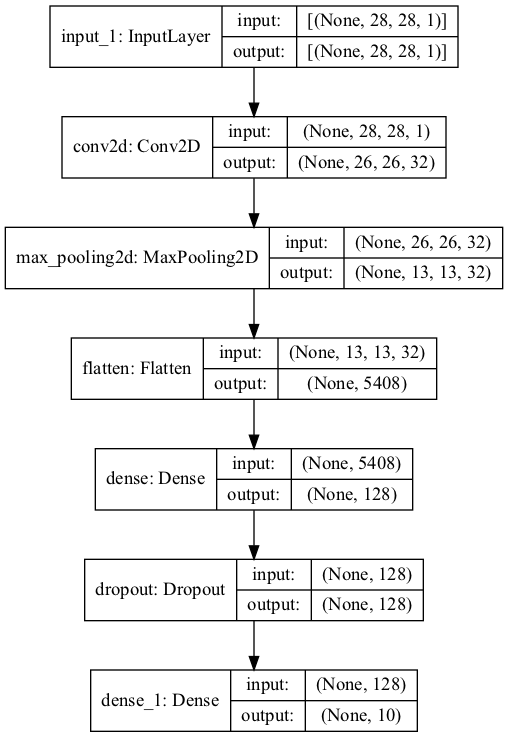

In [15]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## 学習

In [17]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                   validation_data = (x_valid, y_valid))

2021-11-24 04:18:15.578540: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-24 04:18:15.581890: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-24 04:18:15.731428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 0.2635 - accuracy: 0.9198

2021-11-24 04:18:28.006967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 14s 9ms/step - loss: 0.2635 - accuracy: 0.9198 - val_loss: 0.1412 - val_accuracy: 0.9553
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1071 - accuracy: 0.9684 - val_loss: 0.1148 - val_accuracy: 0.9671
Epoch 3/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0850 - accuracy: 0.9747 - val_loss: 0.0882 - val_accuracy: 0.9733
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0949 - val_accuracy: 0.9711
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0780 - val_accuracy: 0.9770
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.0793 - val_accuracy: 0.9

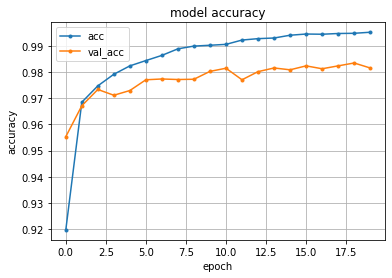

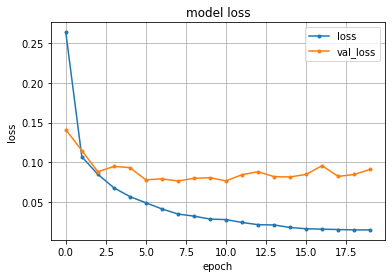

In [18]:
# 精度のplot
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

## 予測（MC-Dropout）

T回予測の平均と標準偏差を求める

In [19]:
T = 100

In [20]:
%%time
y_pred_result = []

for t in range(T):
    y_pred = model.predict(x_test)
    y_pred_result.append(y_pred)

y_pred_result = np.array(y_pred_result)
y_pred_result = y_pred_result.transpose(2, 1, 0)

2021-11-24 06:41:31.880993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


CPU times: user 29.4 s, sys: 25.7 s, total: 55 s
Wall time: 56.3 s


In [21]:
y_pred_result.shape

(10, 10000, 100)

In [22]:
df_mean = pd.DataFrame()
df_std = pd.DataFrame()
df_mean

""


In [23]:
# 0 ~ 9について
for i, num_pred in enumerate(y_pred_result):
    pred_mean_list = []
    pred_std_list = []
    
    # 10000個のテストデータについて
    for y_pred in num_pred:    
        # T回の予測の平均・標準偏差
        pred_mean = np.mean(y_pred)
        pred_std  = np.std(y_pred)
        
        pred_mean_list.append(pred_mean)
        pred_std_list.append(pred_std)
    
    df_mean_tmp = pd.DataFrame(data=pred_mean_list, columns=[f"mean_{i}"])
    df_std_tmp = pd.DataFrame(data=pred_std_list, columns=[f"std_{i}"])
    
    df_mean = pd.concat([df_mean, df_mean_tmp], axis=1)
    df_std = pd.concat([df_std, df_std_tmp], axis=1)

### T回予測の平均

In [24]:
df_mean

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9
0,7.330849e-09,1.105189e-04,7.029428e-05,2.175564e-05,8.088915e-07,2.848301e-10,4.788756e-12,9.997936e-01,2.953955e-06,3.305001e-08
1,9.536904e-08,1.492924e-06,9.984221e-01,1.684502e-07,4.432419e-10,4.169798e-10,1.576168e-03,2.743464e-10,1.357522e-09,1.490806e-11
2,4.810072e-07,9.999717e-01,1.603295e-05,1.550646e-06,2.418916e-06,1.594180e-08,2.861927e-06,3.100115e-06,1.470771e-06,3.670280e-07
3,9.994450e-01,7.806916e-08,4.887049e-07,4.611235e-09,9.574636e-05,5.178439e-08,3.229228e-05,4.246706e-04,6.666692e-07,1.071326e-06
4,2.024636e-07,4.661611e-07,2.528232e-08,2.721788e-10,9.999800e-01,4.823867e-07,8.048660e-07,2.713440e-07,9.160684e-08,1.773886e-05
...,...,...,...,...,...,...,...,...,...,...
9995,8.337526e-12,1.156493e-06,9.999828e-01,1.473503e-05,6.494559e-11,1.264516e-09,1.336204e-13,1.035866e-06,2.242661e-07,6.133793e-11
9996,6.629192e-04,3.432890e-07,3.209111e-05,9.992931e-01,5.460402e-10,3.468958e-07,4.812936e-09,1.045524e-05,1.316785e-07,7.093527e-07
9997,2.393126e-13,4.321490e-08,4.165102e-12,4.676096e-15,9.999984e-01,1.026005e-09,7.542097e-11,1.572429e-08,1.543164e-06,4.918705e-09
9998,2.679512e-07,7.727045e-09,1.501090e-07,1.293727e-04,1.138250e-07,9.985896e-01,1.214033e-05,6.537236e-06,1.261593e-03,2.771512e-07


### T回予測の標準偏差

In [25]:
df_std

,std_0,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9
0,7.177158e-08,1.090514e-03,3.351214e-04,1.149561e-04,7.533506e-06,2.509313e-09,3.524217e-11,1.141136e-03,2.158583e-05,1.710695e-07
1,7.325626e-07,1.308905e-05,1.568180e-02,1.600250e-06,4.409924e-09,4.148887e-09,1.568196e-02,2.404564e-09,1.014347e-08,1.483097e-10
2,3.302700e-06,1.387005e-04,1.140488e-04,1.529171e-05,1.528878e-05,6.022007e-08,1.715544e-05,2.184767e-05,9.820454e-06,2.369417e-06
3,4.493651e-03,5.468335e-07,3.998135e-06,4.260931e-08,7.706532e-04,3.572509e-07,2.250480e-04,4.225213e-03,4.457177e-06,9.231734e-06
4,1.984744e-06,4.269951e-06,2.469265e-07,2.654356e-09,7.853687e-05,4.786582e-06,7.811524e-06,1.702316e-06,8.751697e-07,7.814361e-05
...,...,...,...,...,...,...,...,...,...,...
9995,5.542647e-11,1.060767e-05,1.558997e-04,1.449776e-04,6.461764e-10,1.258142e-08,8.585131e-13,9.763829e-06,1.386769e-06,6.102669e-10
9996,6.595891e-03,2.939661e-06,3.014285e-04,6.986601e-03,3.754935e-09,1.973287e-06,4.726671e-08,8.336550e-05,1.290167e-06,5.929767e-06
9997,2.247552e-12,3.875815e-07,3.970921e-11,2.452176e-14,1.535368e-05,6.830556e-09,6.273520e-10,1.370099e-07,1.534458e-05,3.042262e-08
9998,2.105148e-06,3.906674e-08,1.133380e-06,1.051121e-03,7.732505e-07,6.331091e-03,8.059621e-05,5.257220e-05,6.186307e-03,2.109883e-06


### 上位3つの平均・標準偏差をまとめたDataFrame

In [26]:
all_result = [pd.DataFrame(columns=["y_actual", "y_pred", "mean", "std"]) for i in range(3)]

for (i, row_mean), (i, row_std) in zip(df_mean.iterrows(), df_std.iterrows()):
    arg_sort = np.argsort(row_mean)[::-1]
    
    for j in range(3):
        all_result[j] = all_result[j].append({
            "y_actual": np.argmax(y_test[i]),
            "y_pred": arg_sort[j],
            "mean": row_mean[arg_sort[j]],
            "std": row_std[arg_sort[j]],
        }, ignore_index=True)

all_result

[      y_actual  y_pred      mean       std
 0          7.0     7.0  0.999794  0.001141
 1          2.0     2.0  0.998422  0.015682
 2          1.0     1.0  0.999972  0.000139
 3          0.0     0.0  0.999445  0.004494
 4          4.0     4.0  0.999980  0.000079
 ...        ...     ...       ...       ...
 9995       2.0     2.0  0.999983  0.000156
 9996       3.0     3.0  0.999293  0.006987
 9997       4.0     4.0  0.999998  0.000015
 9998       5.0     5.0  0.998590  0.006331
 9999       6.0     6.0  0.999990  0.000103
 
 [10000 rows x 4 columns],
       y_actual  y_pred      mean       std
 0          7.0     1.0  0.000111  0.001091
 1          2.0     6.0  0.001576  0.015682
 2          1.0     2.0  0.000016  0.000114
 3          0.0     7.0  0.000425  0.004225
 4          4.0     9.0  0.000018  0.000078
 ...        ...     ...       ...       ...
 9995       2.0     3.0  0.000015  0.000145
 9996       3.0     0.0  0.000663  0.006596
 9997       4.0     8.0  0.000002  0.000015
 99

### 標準偏差の高い順にソート

In [27]:
all_result_order = []

index_sort_std = all_result[0].sort_values("std", ascending=False).index

for i in range(3):
    all_result_order.append(all_result[i].reindex(index=index_sort_std))

all_result_order

[      y_actual  y_pred      mean       std
 211        5.0     3.0  0.565096  0.453987
 1549       4.0     6.0  0.571694  0.453175
 6532       0.0     5.0  0.490599  0.435986
 6574       2.0     2.0  0.503926  0.435510
 9634       0.0     0.0  0.579819  0.431089
 ...        ...     ...       ...       ...
 9718       4.0     4.0  1.000000  0.000000
 6340       2.0     2.0  1.000000  0.000000
 5472       3.0     3.0  1.000000  0.000000
 6995       4.0     4.0  1.000000  0.000000
 8754       4.0     4.0  1.000000  0.000000
 
 [10000 rows x 4 columns],
       y_actual  y_pred          mean           std
 211        5.0     5.0  3.789769e-01  4.401397e-01
 1549       4.0     2.0  1.847860e-01  3.444583e-01
 6532       0.0     0.0  4.650554e-01  4.296635e-01
 6574       2.0     6.0  4.865462e-01  4.368237e-01
 9634       0.0     1.0  2.497502e-01  3.795181e-01
 ...        ...     ...           ...           ...
 9718       4.0     8.0  1.034059e-10  8.423484e-10
 6340       2.0     3.0  1.

## 不確実性の高い画像 Top 5

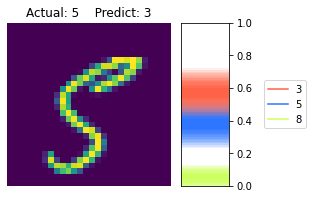

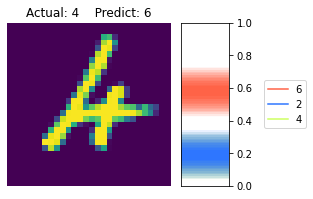

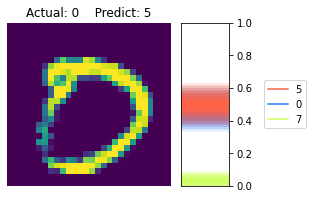

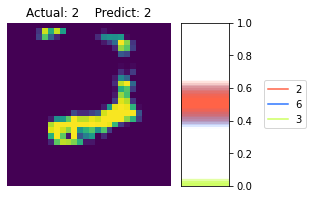

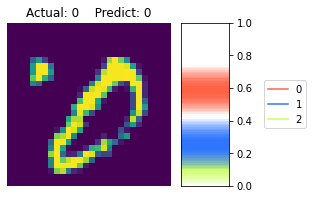

In [47]:
n_top = 5

for i, row in list(all_result_order[0].iterrows())[:n_top]:
    plt.figure(figsize=(4, 3))
    gs = gridspec.GridSpec(3, 4)
    
    plt.subplot(gs[:, :3])
    plt.imshow(x_test[i])
    plt.title(f"Actual: {int(row['y_actual'])}" + f"    Predict: {int(row['y_pred'])}")
    plt.axis("off")
    
    plt.subplot(gs[:, 3:])
    X = np.arange(start=0, stop=1, step=0.01)
    x = []
    
    # 上位3つの平均・標準偏差に基づいて正規分布からサンプリング（図示に用いる）
    for j in range(3):
        x.append(stats.norm.pdf(x=X, loc=all_result_order[j].at[i, "mean"], scale=all_result_order[j].at[i, "std"]))
    
    for j in list(range(3))[::-1]:
        sns.heatmap(x[j].reshape(-1, 1), cmap=color_alpha[j], cbar = False, xticklabels=False, label=f"no.")
    
    plt.plot([], c=[c / 255. for c in color_set[0]], label=f"{int(all_result_order[0].at[i, 'y_pred'])}")
    plt.plot([], c=[c / 255. for c in color_set[1]], label=f"{int(all_result_order[1].at[i, 'y_pred'])}")
    plt.plot([], c=[c / 255. for c in color_set[2]], label=f"{int(all_result_order[2].at[i, 'y_pred'])}")

    plt.gca().spines[:].set_visible(True)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.tick_right()
    plt.yticks(np.arange(0, 110, 20), [round(n, 1) for n in np.arange(0, 1.1, 0.2)], rotation=0)
    plt.legend(bbox_to_anchor=(1.6, 0.5), loc='center left')
    plt.show()

#### 画像のみver

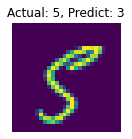

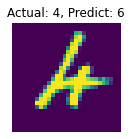

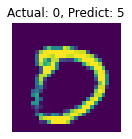

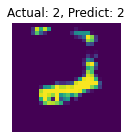

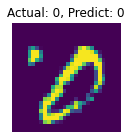

In [48]:
for i, row in list(all_result_order[0].iterrows())[:n_top]:
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i])
    plt.title(f"Actual: {int(row['y_actual'])}" + f", Predict: {int(row['y_pred'])}")
    plt.axis("off")
    plt.show()

## 予測分布の比較

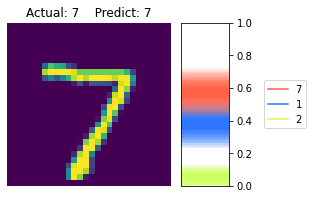

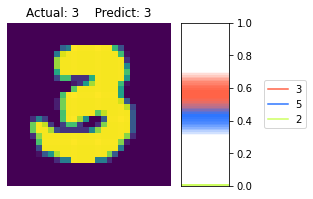

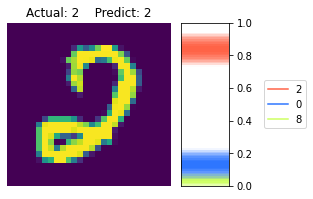

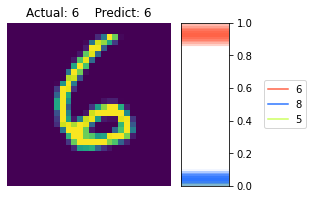

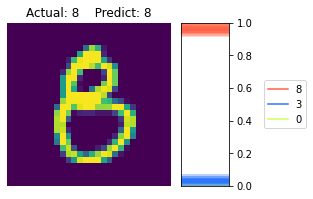

In [53]:
X = np.arange(start=0, stop=1, step=0.01)

# 比較のため適当に間隔をあけて図示
for i in range(0, 1000, 200):
    plt.figure(figsize=(4, 3))
    gs = gridspec.GridSpec(3, 4)
    
    plt.subplot(gs[:, :3])
    plt.imshow(x_test[i])
    plt.title(f"Actual: {int(all_result_order[0].at[i, 'y_actual'])}" + f"    Predict: {int(all_result_order[0].at[i, 'y_pred'])}")
    plt.axis("off")
    
    plt.subplot(gs[:, 3:])
    X = np.arange(start=0, stop=1, step=0.01)
    x = []
    
    # 上位3つの平均・標準偏差に基づいて正規分布からサンプリング（図示に用いる）
    for j in range(3):
        x.append(stats.norm.pdf(x=X, loc=all_result_order[j].iloc[i]["mean"], scale=all_result_order[j].iloc[i]["std"]))
    
    for j in list(range(3))[::-1]:
        sns.heatmap(x[j].reshape(-1, 1), cmap=color_alpha[j], cbar = False, xticklabels=False, label=f"no.")
    
    plt.plot([], c=[c / 255. for c in color_set[0]], label=f"{int(all_result_order[0].at[i, 'y_pred'])}")
    plt.plot([], c=[c / 255. for c in color_set[1]], label=f"{int(all_result_order[1].at[i, 'y_pred'])}")
    plt.plot([], c=[c / 255. for c in color_set[2]], label=f"{int(all_result_order[2].at[i, 'y_pred'])}")

    plt.gca().spines[:].set_visible(True)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.tick_right()
    plt.yticks(np.arange(0, 110, 20), [round(n, 1) for n in np.arange(0, 1.1, 0.2)], rotation=0)
    plt.legend(bbox_to_anchor=(1.6, 0.5), loc='center left')
    plt.show()